In [3]:
import tweepy
from textblob import TextBlob
import csv
import matplotlib.pyplot as plt

In [9]:
consumer_key = 'UCujhsLfO0glDQ8OPdp4HRML5'
consumer_secret = 'TAKFH2IArh2hcF3vEh3BVLevuCNvCpf5bVHVlEgGYgVnkICFBm'
access_token = '371175989-AxkfksYUF8r4Js66YDX32vBPugtxlX76Ex9knttc'
access_token_secret = 'rkfbATQzJo87S9wuwe2Plaj5Inj6eSQJuhIK3YXuvGg8o'

In [12]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.search('Buhari',count=100)

In [13]:
tweet_sentiments =[]
#Opening the dataset.csv filefor writinh the tweets in it
with open('dataset.csv', mode='w', encoding ='utf-8') as tweets_file:
    tweet_writer = csv.writer(tweets_file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    #Labelling the columns for the tweet dataset
    tweet_writer.writerow(['Tweet', 'Author', 'Date', 'Sentiment Polarity'])
    #Analyzing each tweet from the tweets list and storing it in a csv file
    for tweet in public_tweets:
        tweet_text = tweet.text
        tweet_user = tweet.user.name
        tweet_created_at = tweet.created_at
        tweet_sentiment = TextBlob(tweet_text).sentiment.polarity
        tweet_sentiments.append(TextBlob(tweet_text).sentiment.polarity)
#         print(tweet_text, tweet_user, tweet_created_at)
#         print("Sentiment is %f" % tweet_sentiment)
        tweet_writer.writerow([tweet_text, tweet_user, tweet_created_at, tweet_sentiment])
    print('Done')

Done


In [15]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of


Text(0,0.5,'Frequency')

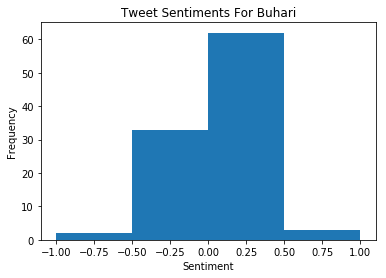

In [19]:

plt.hist(tweet_sentiments, bins=4, range=(-1,1))
plt.title("Tweet Sentiments For Buhari")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")